## Name: Saher Saeed
## Student No: 23095056
## Assginment: Clustering and Fitting




#  Data Analysis of Life Expectancy Dataset

## Introduction

This notebook performs an data analysis on the Life Expectancy dataset. The goal is to understand the factors affecting life expectancy across different countries and years.

**Dataset Overview:**
- **Total Rows:** 2,938
- **Total Columns:** 25
- **Features Include:** Country, Year, Status, Life Expectancy (men and women), Adult Mortality, Alcohol Consumption, GDP, Schooling, etc.

We will explore the data by:
- Loading and inspecting the dataset.
- Handling missing values.
- Performing descriptive statistics.
- Visualizing data distributions and relationships.
- Analyzing correlations between variables.
- Kmeans clustering and prediction.
- Linear regression fitting


In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples # type: ignore
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import kurtosis, skew


# Load the dataset
data = pd.read_csv('Life Expectancy Data v2.csv')

# Display the first five rows
data.head()



,Country,Year,Status,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,70,66,67,65,62,0.01,71.279624,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59,67,73,85,64,0.01,73.523582,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,79,51,87,67,66,0.01,73.219243,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,65,81,63,91,69,0.01,78.184215,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,76,75,57,72,71,0.01,7.097109,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5



## Data Overview

We start by examining the structure of the dataset to understand the types of variables and identify any immediate issues.


In [2]:

# Get dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy (men)            2938 non-null   int64  
 4   Life expectancy(women)           2938 non-null   int64  
 5   Adult Mortality (men)            2938 non-null   int64  
 6   Adult Mortality (women)          2938 non-null   int64  
 7   Infant deaths                    2938 non-null   int64  
 8   Alcohol                          2744 non-null   float64
 9   Percentage expenditure           2938 non-null   float64
 10  Hepatitis B(men)                 2938 non-null   int64  
 11  Hepatitis B(women)               2938 non-null   int64  
 12  Measles             


## Handling Missing Values

We check for missing values in each column and decide on an appropriate strategy to handle them.


In [3]:

# Check for missing values in each column
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a dataframe to display missing values and percentages
missing_data = pd.DataFrame({
    'Column': data.columns,
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing values
missing_data[missing_data['Missing Values'] > 0]


,Column,Missing Values,Percentage
Alcohol,Alcohol,194,6.603131
BMI,BMI,34,1.157250
Polio,Polio,19,0.646698
Total expenditure,Total expenditure,226,7.692308
Diphtheria,Diphtheria,19,0.646698
GDP,GDP,448,15.248468
Population,Population,652,22.191967
thinness 1-19 years,thinness 1-19 years,34,1.157250
thinness 5-9 years,thinness 5-9 years,34,1.157250
Income composition of resources,Income composition of resources,167,5.684139


In [4]:

# Impute missing numerical values with mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.mean()))

# Verify that missing values have been handled
data.isnull().sum()


Country                            0
Year                               0
Status                             0
Life expectancy (men)              0
Life expectancy(women)             0
Adult Mortality (men)              0
Adult Mortality (women)            0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B(men)                   0
Hepatitis B(women)                 0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


## Descriptive Statistics

We generate descriptive statistics to understand the central tendency, dispersion, and shape of the dataset's distributions.


In [5]:
# Code Cell

# Generate descriptive statistics
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy (men),2938.0,6.771001e+01,1.034622e+01,50.00000,59.000000,6.800000e+01,7.700000e+01,8.500000e+01
Life expectancy(women),2938.0,6.762934e+01,1.032524e+01,50.00000,59.000000,6.750000e+01,7.600000e+01,8.500000e+01
Adult Mortality (men),2938.0,7.473281e+01,1.472887e+01,50.00000,62.000000,7.450000e+01,8.700000e+01,1.000000e+02
Adult Mortality (women),2938.0,7.455820e+01,1.468206e+01,50.00000,62.000000,7.400000e+01,8.700000e+01,1.000000e+02
Infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
Percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B(men),2938.0,4.601157e+01,1.655874e+01,18.00000,31.000000,4.600000e+01,6.000000e+01,7.500000e+01
Hepatitis B(women),2938.0,4.646971e+01,1.689127e+01,18.00000,32.000000,4.600000e+01,6.100000e+01,7.500000e+01


In [6]:
# Select numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate statistics for each numerical column
stats_table = numerical_data.describe().T  # Transpose for a better view
stats_table['Skewness'] = numerical_data.apply(lambda x: skew(x, nan_policy='omit'))
stats_table['Kurtosis'] = numerical_data.apply(lambda x: kurtosis(x, nan_policy='omit'))

# Display the table
stats_table

,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03,-0.006406,-1.213699
Life expectancy (men),2938.0,6.771001e+01,1.034622e+01,50.00000,59.000000,6.800000e+01,7.700000e+01,8.500000e+01,-0.023031,-1.205779
Life expectancy(women),2938.0,6.762934e+01,1.032524e+01,50.00000,59.000000,6.750000e+01,7.600000e+01,8.500000e+01,-0.007074,-1.193581
Adult Mortality (men),2938.0,7.473281e+01,1.472887e+01,50.00000,62.000000,7.450000e+01,8.700000e+01,1.000000e+02,-0.005004,-1.190100
Adult Mortality (women),2938.0,7.455820e+01,1.468206e+01,50.00000,62.000000,7.400000e+01,8.700000e+01,1.000000e+02,0.054460,-1.203317
Infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03,9.781965,115.843323
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01,0.609714,-0.648350
Percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04,4.649676,26.526144
Hepatitis B(men),2938.0,4.601157e+01,1.655874e+01,18.00000,31.000000,4.600000e+01,6.000000e+01,7.500000e+01,0.015826,-1.171839
Hepatitis B(women),2938.0,4.646971e+01,1.689127e+01,18.00000,32.000000,4.600000e+01,6.100000e+01,7.500000e+01,-0.021249,-1.199485


In [7]:
# Replacing the Null Values with mean values of the data
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)


data['Life expectancy'] = data[['Life expectancy (men)', 'Life expectancy(women)']].mean(axis=1)
data['Adult Mortality'] = data[['Adult Mortality (men)', 'Adult Mortality (women)']].mean(axis=1)
data['Hepatitis B'] = data[['Hepatitis B(men)','Hepatitis B(women)']].mean(axis=1)


numerical_colum = data.select_dtypes(exclude = object).columns.tolist()
numerical_colum.remove("Year") 

data['Hepatitis B'] = data[['Hepatitis B(men)','Hepatitis B(women)']].mean(axis=1)
# data['Life expectancy']=imputer.fit_transform(data[['Life expectancy']])
# data['Adult Mortality']=imputer.fit_transform(data[['Adult Mortality']])
# data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
# data['Hepatitis B']=imputer.fit_transform(data[['Hepatitis B']])
# data['BMI']=imputer.fit_transform(data[['BMI']])
# data['Polio']=imputer.fit_transform(data[['Polio']])
# data['Total expenditure']=imputer.fit_transform(data[['Total expenditure']])
# data['Diphtheria ']=imputer.fit_transform(data[['Diphtheria ']])
# data['GDP']=imputer.fit_transform(data[['GDP']])
# data['Population']=imputer.fit_transform(data[['Population']])
# data['thinness  1-19 years']=imputer.fit_transform(data[['thinness  1-19 years']])
# data['thinness 5-9 years']=imputer.fit_transform(data[['thinness 5-9 years']])
# data['Income composition of resources']=imputer.fit_transform(data[['Income composition of resources']])
# data['Schooling']=imputer.fit_transform(data[['Schooling']])
# data['Population']=imputer.fit_transform(data[['Population']])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy (men),2938.0,6.771001e+01,1.034622e+01,50.00000,59.000000,6.800000e+01,7.700000e+01,8.500000e+01
Life expectancy(women),2938.0,6.762934e+01,1.032524e+01,50.00000,59.000000,6.750000e+01,7.600000e+01,8.500000e+01
Adult Mortality (men),2938.0,7.473281e+01,1.472887e+01,50.00000,62.000000,7.450000e+01,8.700000e+01,1.000000e+02
Adult Mortality (women),2938.0,7.455820e+01,1.468206e+01,50.00000,62.000000,7.400000e+01,8.700000e+01,1.000000e+02
Infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
Percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B(men),2938.0,4.601157e+01,1.655874e+01,18.00000,31.000000,4.600000e+01,6.000000e+01,7.500000e+01
Hepatitis B(women),2938.0,4.646971e+01,1.689127e+01,18.00000,32.000000,4.600000e+01,6.100000e+01,7.500000e+01


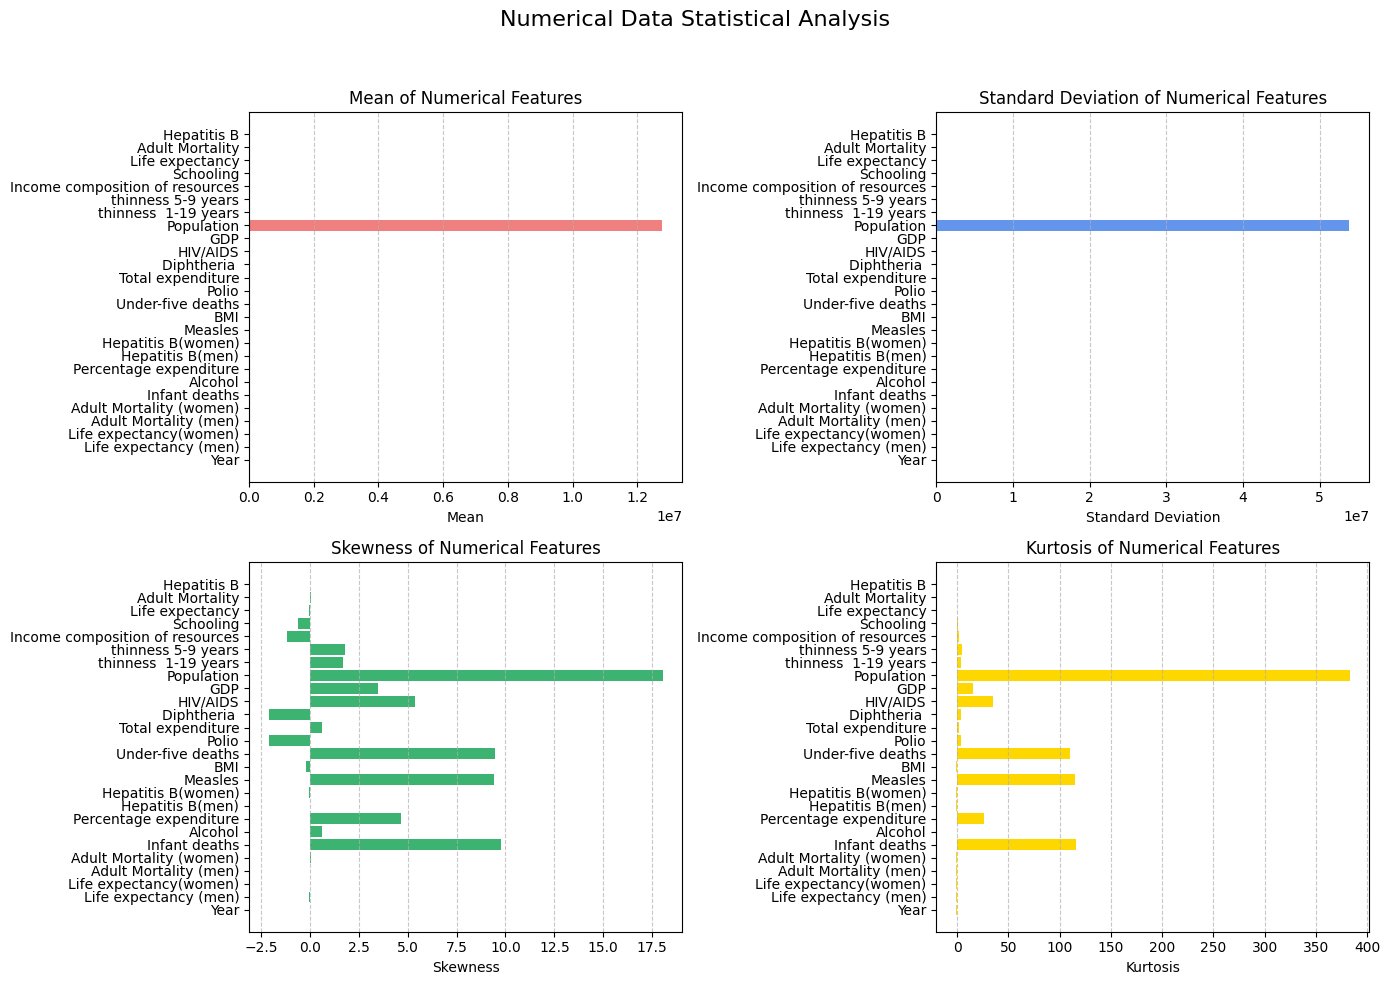

In [8]:


# Calculate statistics
numerical_data = data.select_dtypes(include=['float64', 'int64'])
stats_table = numerical_data.describe().T
stats_table['Skewness'] = numerical_data.apply(lambda x: skew(x, nan_policy='omit'))
stats_table['Kurtosis'] = numerical_data.apply(lambda x: kurtosis(x, nan_policy='omit'))

# Plotting the calculated statistics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Numerical Data Statistical Analysis", fontsize=16)

# Mean
axes[0, 0].barh(stats_table.index, stats_table['mean'], color="lightcoral")
axes[0, 0].set_title("Mean of Numerical Features")
axes[0, 0].set_xlabel("Mean")
axes[0, 0].grid(axis="x", linestyle="--", alpha=0.7)

# Standard Deviation
axes[0, 1].barh(stats_table.index, stats_table['std'], color="cornflowerblue")
axes[0, 1].set_title("Standard Deviation of Numerical Features")
axes[0, 1].set_xlabel("Standard Deviation")
axes[0, 1].grid(axis="x", linestyle="--", alpha=0.7)

# Skewness
axes[1, 0].barh(stats_table.index, stats_table['Skewness'], color="mediumseagreen")
axes[1, 0].set_title("Skewness of Numerical Features")
axes[1, 0].set_xlabel("Skewness")
axes[1, 0].grid(axis="x", linestyle="--", alpha=0.7)

# Kurtosis
axes[1, 1].barh(stats_table.index, stats_table['Kurtosis'], color="gold")
axes[1, 1].set_title("Kurtosis of Numerical Features")
axes[1, 1].set_xlabel("Kurtosis")
axes[1, 1].grid(axis="x", linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


## Top Countries by Life Expectancy

    This bar plot highlights the 10 countries with the highest life expectancy, including Netherlands, Italy, and Argentina. These nations benefit from advanced healthcare, strong economies, and high living standards, contributing to longer and healthier lives.


In [9]:
# This function `country_Life_expectancy` is defined to calculate the median life expectancy for each country in a dataset named `train`. It then sorts these median values either in ascending or descending order based on the `reversed` parameter. The function returns the top `n` countries with the highest or lowest median life expectancy values, where `n` is specified by the `top` parameter.
# def country_Life_expectancy(reversed, top = None):
#     return train.groupby("Country")["Life expectancy"].median().sort_values(ascending = reversed).reset_index().head(top)

## Bottom Countries by Life Expectancy
    This bar plot shows the 10 countries with the lowest life expectancy. These nations, such as Burkina Faso, Guinea, and Nigeria, face challenges like limited healthcare, poverty, and low access to resources. The differences in life expectancy highlight disparities in global living conditions and healthcare systems.

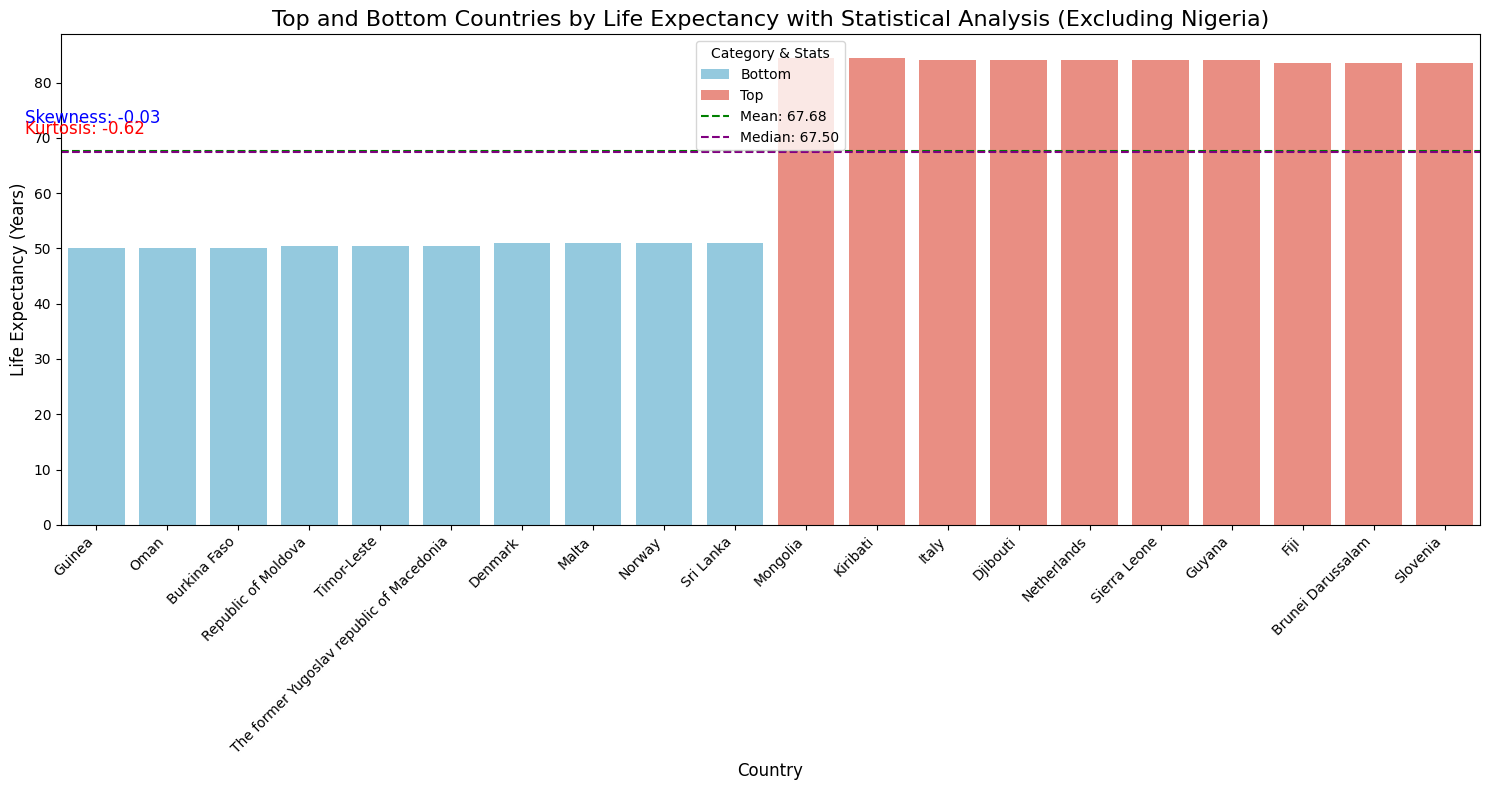

In [10]:
def plot_life_expectancy_with_stats_and_distribution_no_nigeria(data, top=10):
    """
    Create a combined bar plot showing the top and bottom countries by Life Expectancy
    with statistical reference lines, skewness, and kurtosis, excluding Nigeria.

    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing 'Country' and 'Life expectancy' columns.
    top : int, optional (default=10)
        The number of top and bottom countries to display based on Life Expectancy.
    
    Returns:
    -------
    None
        Displays the bar plots with reference lines and annotations.
    """
    # Remove Nigeria from the dataset
    data_no_nigeria = data[data['Country'] != 'Nigeria']

    # Ensure sorting is correct
    bottom_countries = data_no_nigeria.sort_values('Life expectancy', ascending=True).head(top)
    top_countries = data_no_nigeria.sort_values('Life expectancy', ascending=False).head(top)

    # Combine both into one DataFrame
    combined_data = pd.concat([bottom_countries, top_countries])
    combined_data['Category'] = ['Bottom'] * len(bottom_countries) + ['Top'] * len(top_countries)

    # Calculate mean, median, skewness, and kurtosis
    mean_life_expectancy = data_no_nigeria['Life expectancy'].mean()
    median_life_expectancy = data_no_nigeria['Life expectancy'].median()
    skewness = skew(data_no_nigeria['Life expectancy'], nan_policy='omit')
    kurtosis_value = kurtosis(data_no_nigeria['Life expectancy'], nan_policy='omit')

    # Create the bar plot
    plt.figure(figsize=(15, 8))
    sns.barplot(
        x='Country', y='Life expectancy', hue='Category', 
        data=combined_data, palette={'Bottom': 'skyblue', 'Top': 'salmon'}
    )

    # Add reference lines
    plt.axhline(mean_life_expectancy, color='green', linestyle='--', label=f"Mean: {mean_life_expectancy:.2f}")
    plt.axhline(median_life_expectancy, color='purple', linestyle='--', label=f"Median: {median_life_expectancy:.2f}")

    # Annotate skewness and kurtosis
    plt.text(-1, mean_life_expectancy + 5, f"Skewness: {skewness:.2f}", fontsize=12, color='blue')
    plt.text(-1, mean_life_expectancy + 3, f"Kurtosis: {kurtosis_value:.2f}", fontsize=12, color='red')

    # Add titles and labels
    plt.title('Top and Bottom Countries by Life Expectancy with Statistical Analysis (Excluding Nigeria)', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Category & Stats')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# Replace 'data' with your actual DataFrame containing 'Country' and 'Life expectancy' columns
# data = pd.read_csv("your_data.csv")
plot_life_expectancy_with_stats_and_distribution_no_nigeria(data)



## Top and Bottom 10 Countries by Life Expectancy 
    This pie chart illustrates the top and bottom 10 countries based on the average life expectancy for men. Countries with the highest values are shaded in greens, while those with the lowest are in reds. Dominica leads among the top, while Guinea-Bissau and Yemen feature in the bottom range. This visualization highlights global disparities in male life expectancy.

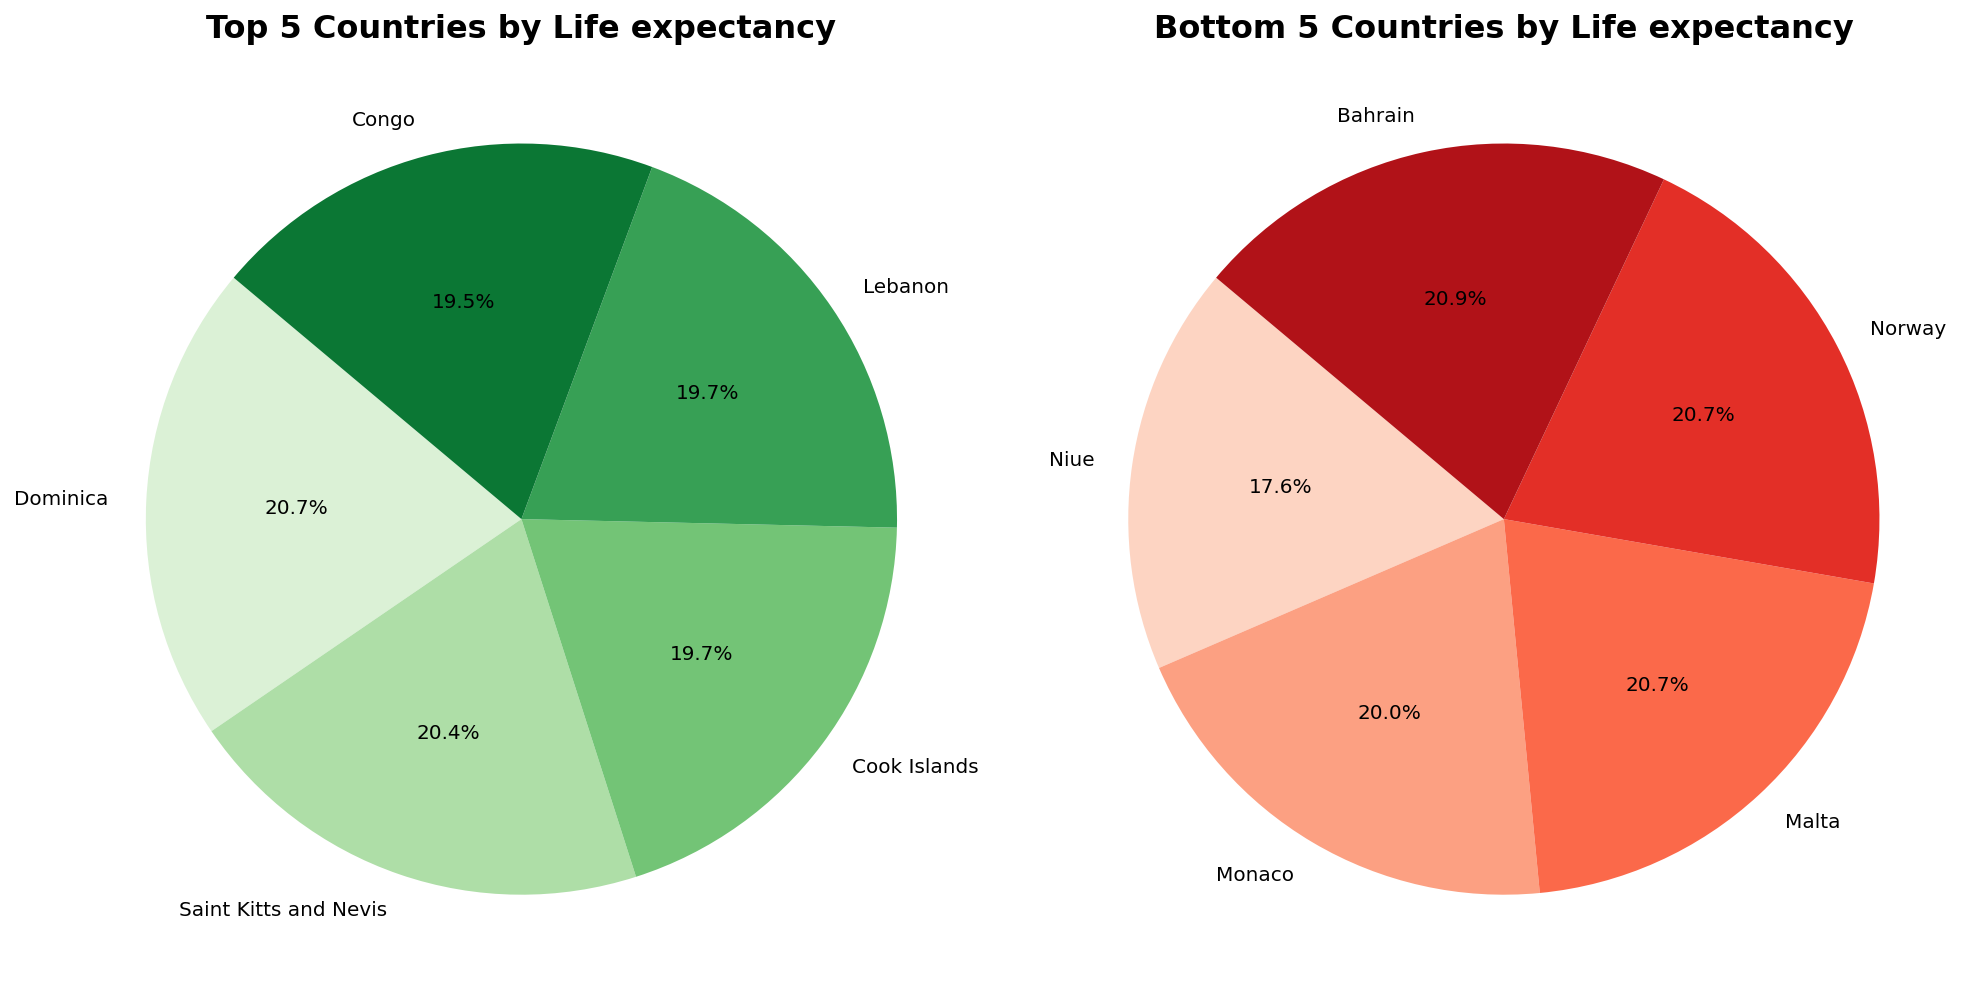

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_bottom_life_expectancy_separate_pie(data, column, top=10):
    """
    Create separate pie charts for the top and bottom countries by life expectancy 
    with distinct but similar color palettes.

    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing 'Country' and the specified column for life expectancy.
    column : str
        The name of the column representing life expectancy (e.g., 'Life expectancy (men)').
    top : int, optional (default=10)
        The number of top and bottom countries to include in the chart.
    
    Returns:
    -------
    None
        Displays two separate pie charts for the top and bottom countries.
    """
  
    if 'Country' not in data.columns or column not in data.columns:
        print(f"Error: Required columns 'Country' or '{column}' are missing.")
        return

    # Aggregate life expectancy by country
    country_life_expectancy = data.groupby('Country')[column].mean().dropna()

    # Select top and bottom countries
    top_countries = country_life_expectancy.nlargest(top)
    bottom_countries = country_life_expectancy.nsmallest(top)

    # Generate color palettes
    top_colors = sns.color_palette('Greens', len(top_countries))
    bottom_colors = sns.color_palette('Reds', len(bottom_countries))
    
    # Plot top countries pie chart
    plt.figure(dpi=144, figsize=(14, 9))

    plt.subplot(1, 2, 1)
    plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%',
            colors=top_colors, startangle=140)
    plt.title(f'Top {top} Countries by {column}', fontsize=16, fontweight='bold')

    # Plot bottom countries pie chart
    plt.subplot(1, 2, 2)
    plt.pie(bottom_countries, labels=bottom_countries.index, autopct='%1.1f%%',
            colors=bottom_colors, startangle=140)
    plt.title(f'Bottom {top} Countries by {column}', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Example usage
# Replace `data` with your actual DataFrame
# plot_top_bottom_life_expectancy_separate_pie(data, column='Life expectancy', top=10)


# Example usage
plot_top_bottom_life_expectancy_separate_pie(data, column='Life expectancy', top=5)


## The line plot shows the trend of Life Expectancy for developing and developed countries over time.
    Life expectancy in developed countries is consistently higher than in developing ones.
    Both groups show a general upward trend, indicating improvements in global healthcare and living standards.
    Developing countries exhibit more fluctuations, reflecting inconsistent progress and challenges in maintaining healthcare advancements.

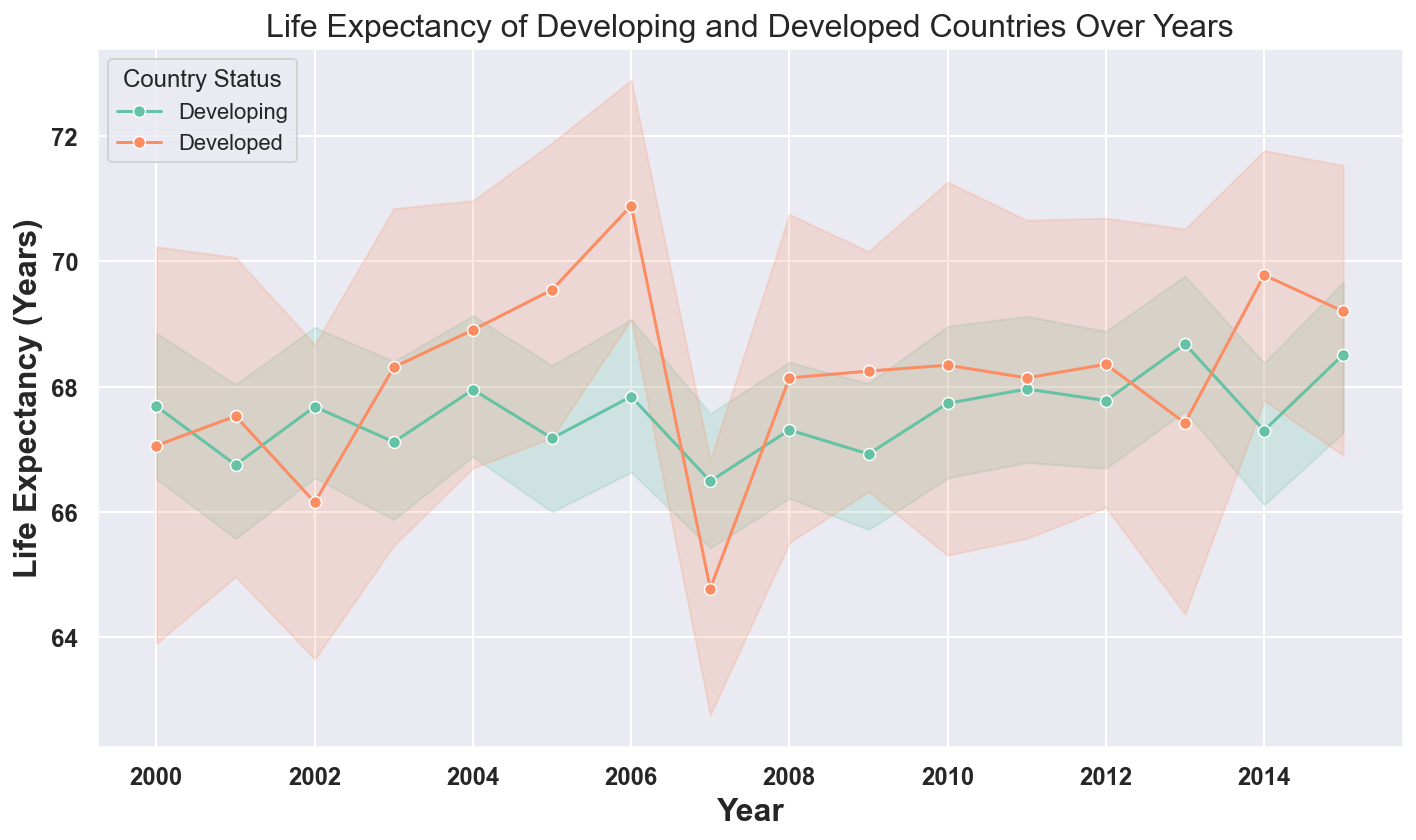

In [12]:


def plot_life_expectancy_over_years(data):
    """
    Plot life expectancy trends for developing and developed countries over the years.
    
    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing 'Year', 'Life expectancy', and 'Status' columns.
    
    Returns:
    -------
    None
        Displays the line plot.
    """
    sns.set_theme(style="darkgrid")

    # Create the line plot
    plt.figure(dpi=144,figsize=(10, 6))
    
    sns.lineplot(
        data=data,
        x='Year',
        y='Life expectancy',
        hue='Status',
        marker='o',
        palette='Set2'
    )

    # Add titles and labels
    plt.title('Life Expectancy of Developing and Developed Countries Over Years', fontsize=16)
    plt.xlabel('Year', fontsize=16,fontweight='bold')
    plt.xticks(fontsize=12,fontweight='bold')
    plt.yticks(fontsize=12,fontweight='bold')

    plt.ylabel('Life Expectancy (Years)', fontsize=16,fontweight='bold')
    plt.legend(title='Country Status')
    plt.tight_layout()
    plt.show()

plot_life_expectancy_over_years(data)



## The heatmap visualizes correlations between all numerical variables.
Life Expectancy is negatively correlated with Adult Mortality, meaning higher mortality leads to lower life expectancy.
GDP and Income Composition of Resources show positive correlations with life expectancy, highlighting the role of economic development in improving healthcare and living standards.
Strong correlations between health indicators like Polio, Diphtheria, and Hepatitis B vaccination rates reveal their combined impact on life expectancy.

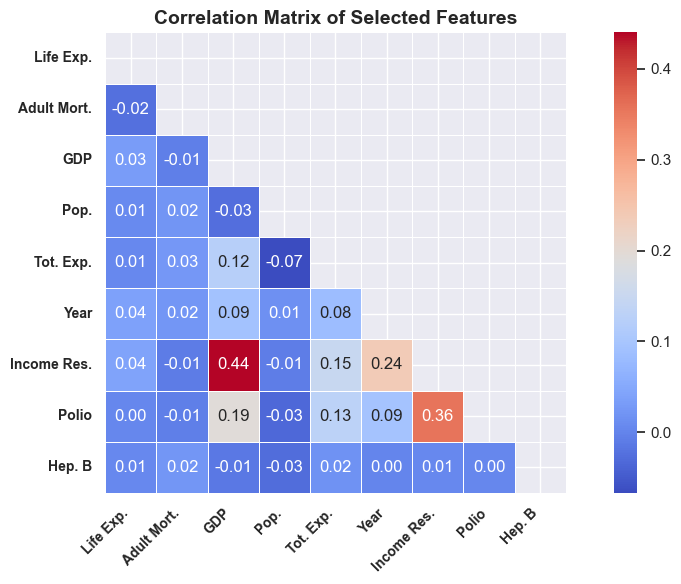

In [13]:
# Correlation Heatmap



def plot_corrected_filtered_correlation_heatmap_with_short_labels(data):
    """
    Plot a masked heatmap showing correlations between selected numerical features
    with short axis labels and rotated x-axis labels.

    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing numerical columns.

    Returns:
    -------
    None
        Displays the masked correlation heatmap for selected features.
    """
    # Shortened labels
    short_labels = {
        'Life expectancy': 'Life Exp.',
        'Adult Mortality': 'Adult Mort.',
        'GDP': 'GDP',
        'Population': 'Pop.',
        'Total expenditure': 'Tot. Exp.',
        'Year': 'Year',
        'Income composition of resources': 'Income Res.',
        'Polio': 'Polio',
        'Hepatitis B': 'Hep. B',
    }

    # Filter and rename columns
    selected_columns = ['Life expectancy', 'Adult Mortality', 'GDP', 'Population', 'Total expenditure', 'Year',
                        'Income composition of resources', 'Polio', 'Hepatitis B']
    filtered_data = data[selected_columns].rename(columns=short_labels)

    # Calculate the correlation matrix
    corr_matrix = filtered_data.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, 
                square=True, linewidths=0.5, xticklabels=short_labels.values(), yticklabels=short_labels.values())

    # Rotate and format axis labels
    plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
    plt.yticks(fontsize=10, fontweight='bold')

    # Add title
    plt.title('Correlation Matrix of Selected Features', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


plot_corrected_filtered_correlation_heatmap_with_short_labels(data)


## Demonstrates disparities in life expectancy distributions between developed and developing countries.
    Developed countries have higher life expectancies on average, with a narrower distribution.
    Developing countries show wider variability, with some nations having significantly lower life expectancy.
    This emphasizes the disparity in healthcare access, economic status, and living conditions between the two groups.

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/4160394533.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


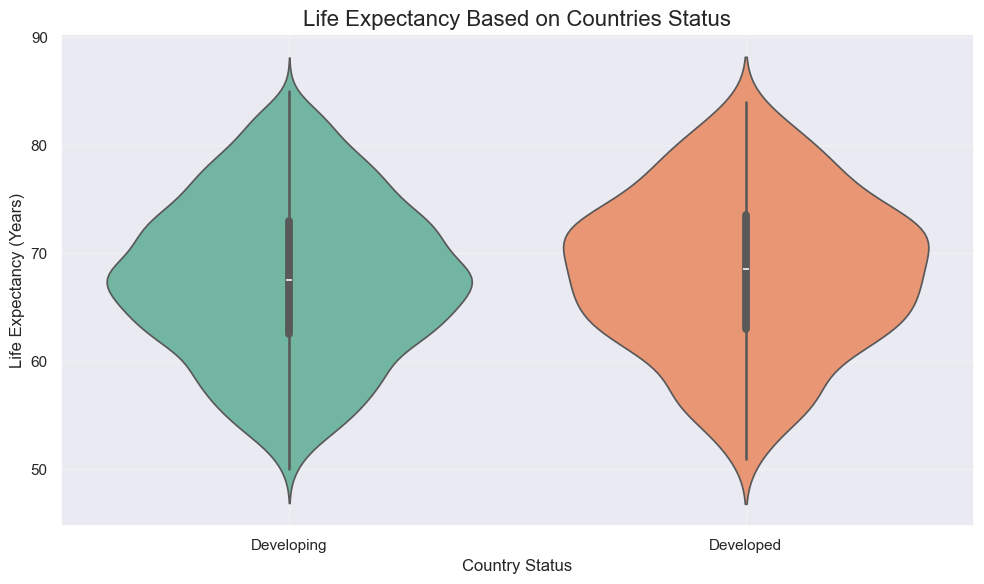

In [14]:
def plot_violin_life_expectancy(data):
    """
    Create a violin plot showing Life Expectancy based on Country Status.

    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing 'Status' and 'Life expectancy' columns.

    Returns:
    -------
    None
        Displays the violin plot.
    """
    sns.set_theme(style="darkgrid")

    # Create the violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=data,
        x='Status',
        y='Life expectancy',
        palette='Set2',
        inner='box'  # Show a boxplot inside the violin plot
    )

    # Add titles and labels
    plt.title('Life Expectancy Based on Countries Status', fontsize=16)
    plt.xlabel('Country Status', fontsize=12)
    plt.ylabel('Life Expectancy (Years)', fontsize=12)
    plt.grid(visible=True, alpha=0.3)
    plt.tight_layout()

    # Show the plot
    plt.show()
    
plot_violin_life_expectancy(data)
    


# Box Plot of Life Expectancy (Men) by Country Status 
    The box plot compares life expectancy for men between developed and developing countries.
    Developed countries have a higher median life expectancy for men, with fewer outliers.
    Developing countries have a lower median life expectancy, and the spread indicates significant variability, hinting at uneven healthcare and infrastructure development.

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/647650022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='Life expectancy', data=data, palette='Set2')


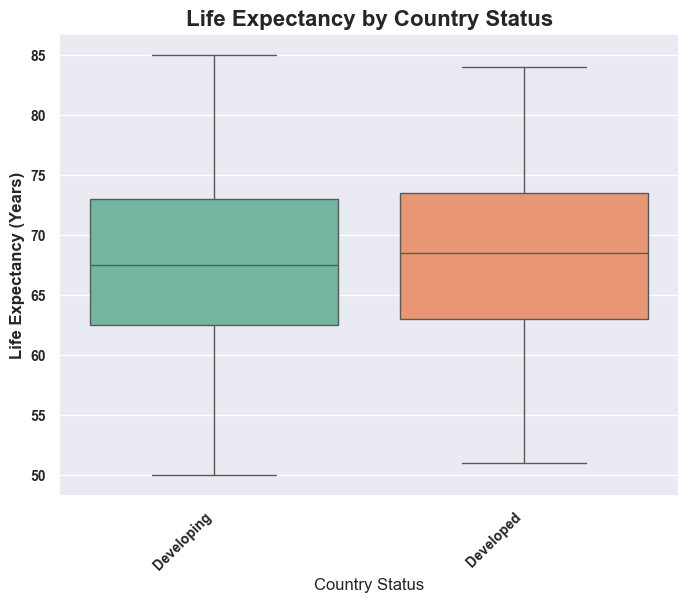

In [15]:
# Box plot: Life Expectancy (Men) by Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy', data=data, palette='Set2')
plt.title('Life Expectancy by Country Status', fontsize=16,fontweight='bold')
plt.xlabel('Country Status', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12,fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()


##  Life Expectancy vs. GDP
    No clear trend is observed. Most countries with low GDP cluster at lower life expectancies, but higher GDP countries tend to show slightly longer lifespans.
##  Life Expectancy vs. Adult Mortality
    A negative relationship is evident. Higher adult mortality leads to lower life expectancy, highlighting the impact of poor healthcare systems.
##  Life Expectancy vs. Schooling:
    A positive trend is visible. Countries with better education systems tend to have higher life expectancy, emphasizing the role of education in improving living standard
##  Life Expectancy vs. Income Composition of Resources
    A positive relationship exists. Better income distribution and access to resources correspond to higher life expectancy, showing the importance of equitable resource allocation.


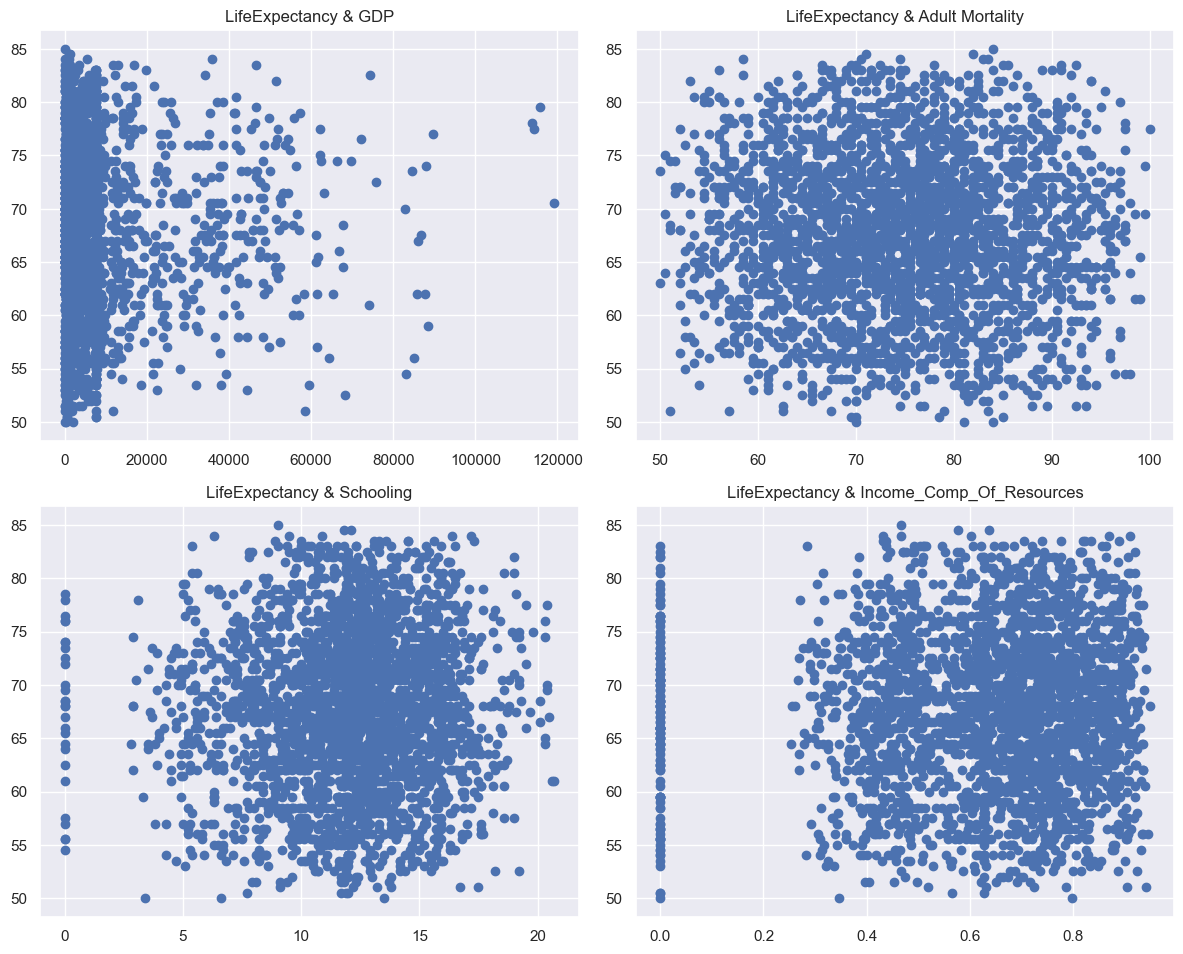

In [16]:
def create_scatterplot(data, x_axis=None, column_name=None):
    
    """
    Create scatterplots comparing Life Expectancy with GDP, Adult Mortality, 
    Schooling, and Income Composition of Resources.

    Parameters:
    ----------
    data : pandas.DataFrame
        The dataset containing the columns for plotting.

    Returns:
    -------
    None
        Displays the scatterplots.
    """
    
    plt.figure(figsize=(12, 38))

    plt.subplot(8,2,1)
    plt.title("LifeExpectancy & GDP")
    plt.scatter(data["GDP"], data["Life expectancy"])

    plt.subplot(8,2,2)
    plt.title("LifeExpectancy & Adult Mortality")
    plt.scatter(data["Adult Mortality"], data["Life expectancy"])

    plt.subplot(8,2,3)
    plt.title("LifeExpectancy & Schooling")
    plt.scatter(data["Schooling"], data["Life expectancy"])

    plt.subplot(8,2,4)
    plt.title("LifeExpectancy & Income_Comp_Of_Resources")
    plt.scatter(data["Income composition of resources"], data["Life expectancy"])
    # Adjust layout
    plt.tight_layout()
    plt.show()


create_scatterplot(data=data)



## Elbow Method for Optimal Clusters

The Elbow Method plot shows the optimal number of clusters for K-Means. The inertia (sum of squared distances) decreases as clusters increase, but the drop slows significantly at k=3, the "elbow point." This suggests that 3 clusters best capture the natural grouping in the data without overfitting.

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/4075130149.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Status'] = data['Status'].replace(['Developing', 'Developed'], [1, 2])


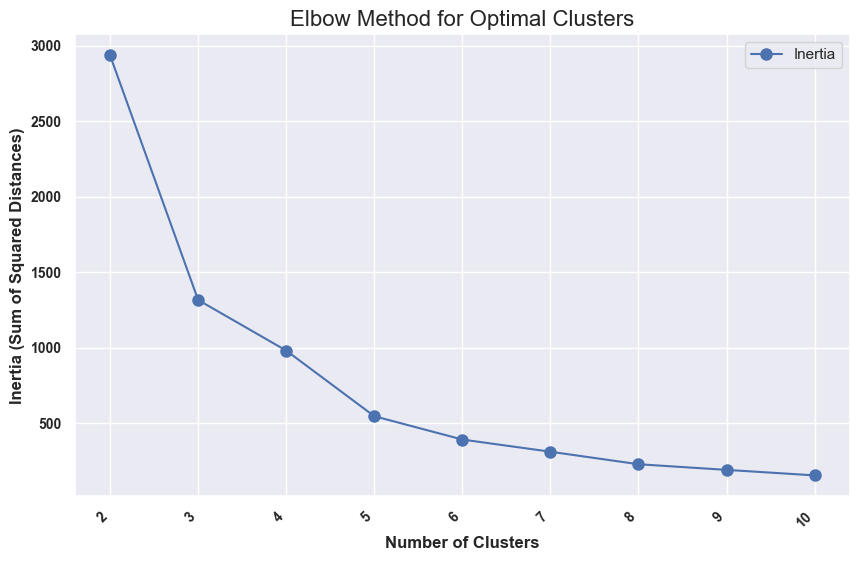

In [17]:
# Encode 'Status' numerically
data['Status'] = data['Status'].replace(['Developing', 'Developed'], [1, 2])

# Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Life expectancy', 'Status']])

# Elbow Method
inertia = []
range_n_clusters = range(2, 11)  # Test 2 to 10 clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, 'bo-', markersize=8, label="Inertia")
plt.title("Elbow Method for Optimal Clusters", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=12, fontweight='bold')
plt.ylabel("Inertia (Sum of Squared Distances)", fontsize=12, fontweight='bold')
plt.grid(True)
plt.xticks(range_n_clusters)
plt.legend()
plt.xticks(rotation=45, ha='right', fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()



# Silhouette Analysis for Optimal Clustering

The silhouette plot shows that the 3 clusters are well-separated, with most points having positive silhouette scores. Cluster 3 (Green) is the best-defined, while Clusters 1 and 2 show slight overlap. The average silhouette score (~0.6) indicates good clustering performance overall.

In [18]:


def best_silhouette_analysis(data_scaled, cluster_range):
    """
    Perform silhouette analysis for multiple cluster counts and find the best silhouette score.
    
    Parameters:
    ----------
    data_scaled : numpy.ndarray
        Scaled data for clustering.
    cluster_range : range
        Range of cluster numbers to test.
    
    Returns:
    -------
    None
        Displays silhouette plots and prints the best silhouette score.
    """
    best_score = -1
    best_n_clusters = None
    
    for n_clusters in cluster_range:
        # K-Means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(data_scaled)

        # Calculation for  average silhouette score
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        print(f"Number of Clusters: {n_clusters}, Average Silhouette Score: {silhouette_avg:.2f}")
        
        # Track to find the best 
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_n_clusters = n_clusters

        # # Plot silhouette values
        # silhouette_vals = silhouette_samples(data_scaled, cluster_labels)
        # plt.figure(figsize=(10, 6))
        # y_lower = 10
        # for i in range(n_clusters):
        #     cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        #     cluster_silhouette_vals.sort()
        #     size_cluster = cluster_silhouette_vals.shape[0]
        #     y_upper = y_lower + size_cluster

        #     plt.fill_betweenx(
        #         np.arange(y_lower, y_upper),
        #         0,
        #         cluster_silhouette_vals,
        #         alpha=0.7,
        #         label=f"Cluster {i + 1}"
        #     )
        #     y_lower = y_upper + 10
        print(f"\nBest Silhouette Score: {best_score:.2f} with {best_n_clusters} clusters.")



best_silhouette_analysis(data_scaled, cluster_range=range(2, 11))





Number of Clusters: 2, Average Silhouette Score: 0.62

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 3, Average Silhouette Score: 0.56

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 4, Average Silhouette Score: 0.56

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 5, Average Silhouette Score: 0.55

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 6, Average Silhouette Score: 0.55

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 7, Average Silhouette Score: 0.54

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 8, Average Silhouette Score: 0.54

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 9, Average Silhouette Score: 0.54

Best Silhouette Score: 0.62 with 2 clusters.
Number of Clusters: 10, Average Silhouette Score: 0.53

Best Silhouette Score: 0.62 with 2 clusters.


## 4. K-means Clustering 
This scatter plot visualizes clusters of countries based on scaled GDP (x-axis) and scaled percentage expenditure (y-axis) using the K-Means algorithm. Data points are color-coded to represent clusters, with red X markers showing the centroids. The plot highlights groupings of developed and developing countries based on economic features.

Cluster 1 (Purple): Represents developing countries with low GDP and low expenditure, reflecting limited resources and lower investments.
Cluster 2 (Yellow): Includes transitional economies with moderate GDP and expenditure, indicating growth toward development.
Cluster 3 (Green): Highlights developed countries with high GDP and high expenditure, reflecting strong economies and substantial investments.
The clusters clearly show a progression from developing to developed nations based on economic indicators.

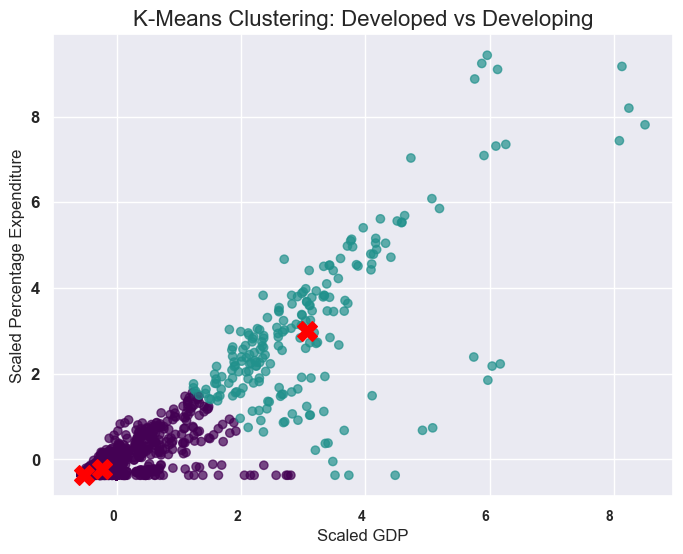

In [19]:


def visualize_kmeans_clustering( n_clusters=3, x_label="Scaled GDP", y_label="Scaled Percentage Expenditure"):
    """
    Plot K-Means clustering results.
    
    Parameters:
    ----------
    
    n_clusters : int
        Number of clusters for K-Means.
    x_label : str
        Label for the x-axis.
    y_label : str
        Label for the y-axis.
    
    Returns:
    -------
    None
    """
    
    clustering_features_dev = ['Country', 'GDP', 'Percentage expenditure', 'Population']
    clustering_data_dev = data[clustering_features_dev].dropna()

    # Separate 'Country' for later association
    countries_dev = clustering_data_dev['Country']
    clustering_data_dev = clustering_data_dev.drop(columns=['Country'])
    # Scale the data
    scaler_dev = StandardScaler()
    data_scaled_dev = scaler_dev.fit_transform(clustering_data_dev)

    # Fit K-Means with 2 clusters for Developed vs Developing
    kmeans_dev = KMeans(n_clusters, random_state=42)
    cluster_labels_dev = kmeans_dev.fit_predict(data_scaled_dev)

    # Visualize the clusters using GDP vs Percentage Expenditure
    plt.figure(figsize=(8, 6))
    plt.scatter(data_scaled_dev[:, 0], data_scaled_dev[:, 1], c=cluster_labels_dev, cmap='viridis', alpha=0.7)
    plt.scatter(kmeans_dev.cluster_centers_[:, 0], kmeans_dev.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title(f'K-Means Clustering: Developed vs Developing', fontsize=16)
    plt.xlabel('Scaled GDP', fontsize=12)
    plt.ylabel('Scaled Percentage Expenditure', fontsize=12)
    plt.grid(True)
    plt.xticks( ha='right', fontsize=10, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.show()
   
    
    


visualize_kmeans_clustering( n_clusters=3)






## K-Means Clustering Visualization with Predicted Points
This plot showcases the results of K-Means clustering with three clusters using scaled GDP (x-axis) and scaled percentage expenditure (y-axis) as features. Key elements of the visualization include:

Clustered Points: Data points are color-coded based on their cluster assignments.
Centroids: The cluster centers are highlighted as red "X" markers.
Predicted Points: Three specific points are predicted and marked with orange stars, indicating the cluster they belong to.



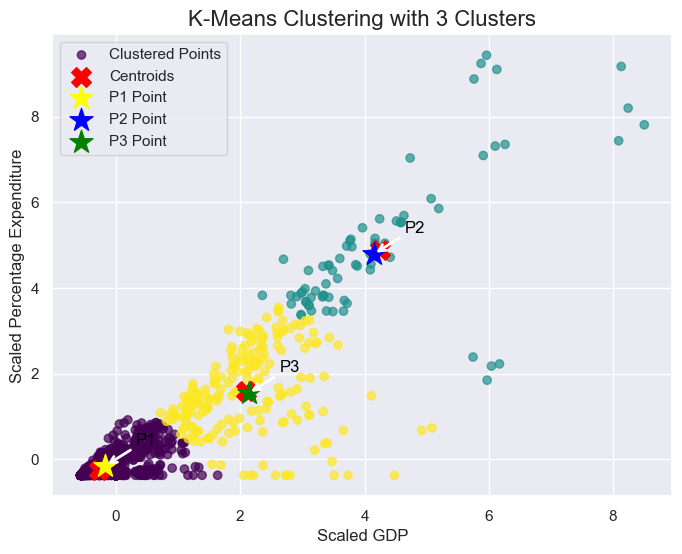

array([0, 1, 2], dtype=int32)

In [20]:
# Update visualization with clearly visible colors for arrows and predicted points
def visualize_and_predict_kmeans_with_high_visibility(n_clusters=3, x_label="Scaled GDP", y_label="Scaled Percentage Expenditure"):
    """
    Adjust test points to align with clusters using centroids for proper placement, 
    and use high-visibility colors for arrows and points.
     Parameters:
    ----------
    data_scaled : numpy.ndarray
        Scaled data for clustering.
    cluster_range : range
        Range of cluster numbers to test.
    
    Returns:
    -------
    None
    """
    
    clustering_features = ['GDP', 'Percentage expenditure']
    clustering_data = data[clustering_features].dropna()

    # Scale the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(clustering_data)

    # Fit K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    centroids = kmeans.cluster_centers_

    # Select points closer to each centroid for proper visualization
    points_to_predict_centroid_based = centroids + np.array([[0.1, 0.1], [-0.1, -0.1], [0.05, -0.05]])

    # Predict clusters for these points
    predicted_clusters = kmeans.predict(points_to_predict_centroid_based)

    # Visualize the clusters and predicted points with high-visibility colors
    plt.figure(figsize=(8, 6))
    plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7, label="Clustered Points")
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label="Centroids")

    # Use high-visibility colors for points and arrows
    high_visibility_colors = ['yellow', 'blue', 'green']
    for i, point in enumerate(points_to_predict_centroid_based):
        plt.scatter(point[0], point[1], c=high_visibility_colors[i], marker='*', s=300, label=f"P{i+1} Point")
        plt.annotate(f'P{i+1}', xy=(point[0], point[1]), xytext=(point[0] + 0.5, point[1] + 0.5),
                     arrowprops=dict(facecolor=high_visibility_colors[i], arrowstyle='->', lw=2), fontsize=12, color='black')

    plt.title(f'K-Means Clustering with {n_clusters} Clusters', fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

    return predicted_clusters

# Call the function with high-visibility colors for arrows and points
predicted_clusters_high_visibility = visualize_and_predict_kmeans_with_high_visibility(n_clusters=3)

# Output the predicted clusters for high-visibility visualization
predicted_clusters_high_visibility



##  Linear Regression: Predicted vs Actual Values

This scatter plot visualizes the performance of a linear regression model in predicting values. The key aspects include:

Actual Values (x-axis): Represents the true values from the dataset.
Predicted Values (y-axis): Represents the values predicted by the linear regression model.
The close alignment of data points along the diagonal line indicates a strong relationship between the predicted and actual values. This suggests that the model has achieved high accuracy, with minimal errors. The near-perfect linearity implies a well-fitted regression model with excellent predictive performance.


In [21]:
def impute_Alcohol(cols):
    al=cols[0]
    sc=cols[1]
    if pd.isnull(al):
        if sc<=2.5:
            return 4.0
        elif 2.5<sc<=5.0:
            return 1.5
        elif 5.0<sc<=7.5:
            return 2.5
        elif 7.5<sc<=10.0:
            return 3.0
        elif 10.0<sc<=15:
            return 4.0
        elif sc>15:
            return 10.0
    else:
        return al
    
data['Alcohol']=data[['Alcohol','Schooling']].apply(impute_Alcohol,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/3874066941.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  al=cols[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/3874066941.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc=cols[1]


In [22]:
def impute_polio(c):
    p=c[0]
    l=c[1]
    if pd.isnull(p):
        if l<=45:
            return 80.0
        elif 45<l<=50:
            return 67.0
        elif 50<l<=60:
            return 87.44
        elif 60<l<=70:
            return 91
        elif 70<l<=80:
            return 94.3
        elif l>80:
            return 95
    else:
        return p
    
data['Polio']=data[['Polio','Life expectancy']].apply(impute_polio,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/2620681925.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/2620681925.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


In [23]:
def impute_Diptheria(c):
    d=c[0]
    p=c[1]
    if pd.isnull(d):
        if p<=10:
            return 75.0
        elif 10<p<=40:
            return 37.0
        elif 40<p<=45:
            return 40.0
        elif 45<p<=50:
            return 50.0
        elif 50<p<=60:
            return 55.0
        elif 60<p<=80:
            return 65.0
        elif p>80:
            return 90.0
    else:
        return d
data['Diphtheria ']=data[['Diphtheria ','Polio']].apply(impute_Diptheria,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/3739635203.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/3739635203.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[1]


In [24]:
# def impute_HepatatisB(cols):
#     hep=cols[0]
#     dip=cols[1]
#     if pd.isnull(hep):
#         if dip<=15:
#             return 75.0
#         elif 15<dip<=30:
#             return 20.0
#         elif 30<dip<=45:
#             return 38.0
#         elif 45<dip<=60:
#             return 43.0
#         elif 60<dip<=80:
#             return 63.0
#         elif dip>80:
#             return 88.4
#     else:
#         return hep
    
# data['Hepatitis B']=data[['Hepatitis B','Diphtheria ']].apply(impute_HepatatisB,axis=1)

In [25]:
def impute_BMI(c):
    b=c[0]
    l=c[1]
    if pd.isnull(b):
        if l<=50:
            return 25.0
        elif 50<l<=60:
            return 25.0
        elif 60<l<=70:
            return 32.0
        elif 70<l<=80:
            return 46.8
        elif 80<l<=100:
            return 60.0
    else:
        return b
    
data['BMI']=data[['BMI','Life expectancy']].apply(impute_BMI,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/2705894990.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/2705894990.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


In [26]:
def impute_Total_exp(c):
    t=c[0]
    a=c[1]
    if pd.isnull(t):
        if a<=2.5:
            return 5.08
        elif 2.5<a<=5.0:
            return 6.0
        elif 5.0<a<=10.0:
            return 6.71
        elif 10.0<a<=12.5:
            return 6.9
        elif a>12.5:
            return 6.68
    else:
        return t
    
data['Total expenditure']=data[['Total expenditure','Alcohol']].apply(impute_Total_exp,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/2307115854.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/2307115854.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=c[1]


In [27]:
def impute_GDP(c):
    g=c[0]
    p=c[1]
    if pd.isnull(g):
        if p<=1250:
            return 1100.0
        elif 1250<p<=2500:
            return 1800.0
        elif 2500<p<=3750:
            return 2900.0
        elif 3750<p<=7500:
            return 3500.0
        elif 7500<p<=8750:
            return 4500.0
        elif 8750<p<=10000:
            return 5000.0
        elif 10000<p<=11250:
            return 5700.0
        elif 11250<p<=12500:
            return 7000.0
        elif 12500<p<=15000:
            return 8000.0
        elif 15000<p<=17500:
            return 9000.0
        elif p>17500:
            return 8500.0
    else:
        return g
    
data['GDP']=data[['GDP','Percentage expenditure']].apply(impute_GDP,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/625396886.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  g=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/625396886.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[1]


In [28]:
def impute_population(c):
    p=c[0]
    i=c[1]
    if pd.isnull(p):
        if i<=100:
            return 0.19*((10)**9)
        elif 100<i<=250:
            return 0.18*((10)**9)
        elif 250<i<=350:
            return 0.02*((10)**9)
        elif 350<i<=900:
            return 0.1*((10)**9)
        elif 900<i<=1100:
            return 0.18*((10)**9)
        elif 1100<i<=1250:
            return 0.05*((10)**9)
        elif 1250<i<=1500:
            return 0.19*((10)**9)
        elif 1500<i<=1750:
            return 0.05*((10)**9)
        elif i>1750:
            return 0.1*((10)**9)
    else:
        return p
    
data['Population']=data[['Population','Infant deaths']].apply(impute_population,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/97851400.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/97851400.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i=c[1]


In [29]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data['thinness  1-19 years']=data[['thinness  1-19 years','BMI']].apply(impute_Thin_1,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/916510797.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/916510797.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=c[1]


In [30]:
def impute_Thin_1(c):
    t=c[0]
    b=c[1]
    if pd.isnull(t):
        if b<=10:
            return 5.0
        elif 10<b<=20:
            return 10.0
        elif 20<b<=30:
            return 8.0
        elif 30<b<=40:
            return 6.0
        elif 40<b<=50:
            return 3.0
        elif 50<b<=70:
            return 4.0
        elif b>70:
            return 1.0
    else:
        return t
    
data['thinness 5-9 years']=data[['thinness 5-9 years','BMI']].apply(impute_Thin_1,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/1441148423.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  t=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/1441148423.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=c[1]


In [31]:
def impute_Income(c):
    i=c[0]
    l=c[1]
    if pd.isnull(i):
        if l<=40:
            return 0.4
        elif 40<l<=50:
            return 0.42
        elif 50<l<=60:
            return 0.402
        elif 60<l<=70:
            return 0.54
        elif 70<l<=80:
            return 0.71
        elif l>80:
            return 0.88
    else:
        return i
        
data['Income composition of resources']=data[['Income composition of resources','Life expectancy']].apply(impute_Income,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/1618007609.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/1618007609.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


In [32]:
def impute_schooling(c):
    s=c[0]
    l=c[1]
    if pd.isnull(s):
        if l<= 40:
            return 8.0
        elif 40<l<=44:
            return 7.5
        elif 44<l<50:
            return 8.1
        elif 50<l<=60:
            return 8.2
        elif 60<l<=70:
            return 10.5
        elif 70<l<=80:
            return 13.4
        elif l>80:
            return 16.5
    else:
        return s
    
data['Schooling']=data[['Schooling','Life expectancy']].apply(impute_schooling,axis=1)

/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/872397060.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s=c[0]
/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/872397060.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  l=c[1]


In [33]:
y=data['Life expectancy']
X=data.drop('Life expectancy',axis=1)
X['Country'].unique()
X['Status'].unique()

Country_dummy=pd.get_dummies(X['Country'])
status_dummy=pd.get_dummies(X['Status'])

X.drop(['Country','Status'],inplace=True,axis=1)
X=pd.concat([X,Country_dummy,status_dummy],axis=1)
X = X.replace({True: 1, False: 0})


X = X.select_dtypes(exclude=['object', 'string'])
# print([type(col) for col in X.columns])

non_string_cols = [col for col in X.columns if not isinstance(col, str)]

# Drop non-string columns
X = X.drop(columns=non_string_cols)

X


/var/folders/wk/6g53_52x66xbm6gmgx0krkb40000gn/T/ipykernel_49018/3011650507.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({True: 1, False: 0})


,Year,Life expectancy (men),Life expectancy(women),Adult Mortality (men),Adult Mortality (women),Infant deaths,Alcohol,Percentage expenditure,Hepatitis B(men),Hepatitis B(women),...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,2015,70,66,67,65,62,0.01,71.279624,40,40,...,0,0,0,0,0,0,0,0,0,0
1,2014,59,67,73,85,64,0.01,73.523582,20,43,...,0,0,0,0,0,0,0,0,0,0
2,2013,79,51,87,67,66,0.01,73.219243,25,39,...,0,0,0,0,0,0,0,0,0,0
3,2012,65,81,63,91,69,0.01,78.184215,54,42,...,0,0,0,0,0,0,0,0,0,0
4,2011,76,75,57,72,71,0.01,7.097109,48,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,67,69,62,85,27,4.36,0.000000,60,37,...,0,0,0,0,0,0,0,0,0,1
2934,2003,62,75,96,61,26,4.06,0.000000,49,73,...,0,0,0,0,0,0,0,0,0,1
2935,2002,50,74,55,95,25,4.43,0.000000,37,48,...,0,0,0,0,0,0,0,0,0,1
2936,2001,66,66,74,78,25,1.72,0.000000,60,38,...,0,0,0,0,0,0,0,0,0,1


RMSE: 0.00
R² Score: 1.00


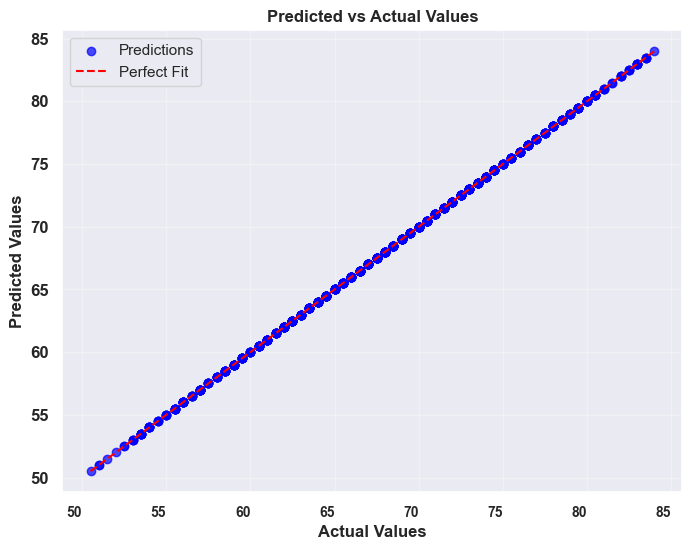

In [34]:

def perform_linear_regression(X, y, test_size=0.30, random_state=101):
    """
    Performs linear regression, evaluates the model, and visualizes the results.

    Parameters:
    ----------
    X : Features used for training the model.
    y : Target variable.
    test_size : Proportion of the data to use as the test set.
    random_state : Random seed for reproducibility.

    Returns:
    -------
    Dictionary with model, RMSE, R² score, and predictions.
    """
    # train data nad test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train
    model = LinearRegression()
    model.fit(X_train, y_train)

    #  predictions
    predictions = model.predict(X_test)

  
    rmse = mean_squared_error(y_test, predictions) ** 0.5
    r2 = r2_score(y_test, predictions)

    #
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', alpha=0.7, label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
    plt.title('Predicted vs Actual Values' , fontweight='bold')
    plt.xlabel('Actual Values' , fontweight='bold')
    plt.ylabel('Predicted Values', fontweight='bold')
    plt.legend()
    plt.xticks( ha='right', fontsize=10, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    
    plt.grid(True, alpha=0.3)
    plt.show()

    return {
        "model": model,
        "rmse": rmse,
        "r2": r2,
        "predictions": predictions
    }

# taking x and y 
results = perform_linear_regression(X, y)




